In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [143]:
df=pd.read_csv("heart_disease_dataset.csv")

In [144]:
df

,age,sex,chest_pain_type,resting bp,serun_cholestrol,fasting_blood_sugar,restecg,maximum heart rate,ex_angina,ST_dep,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


### Data visualization

<AxesSubplot:xlabel='thal', ylabel='target'>

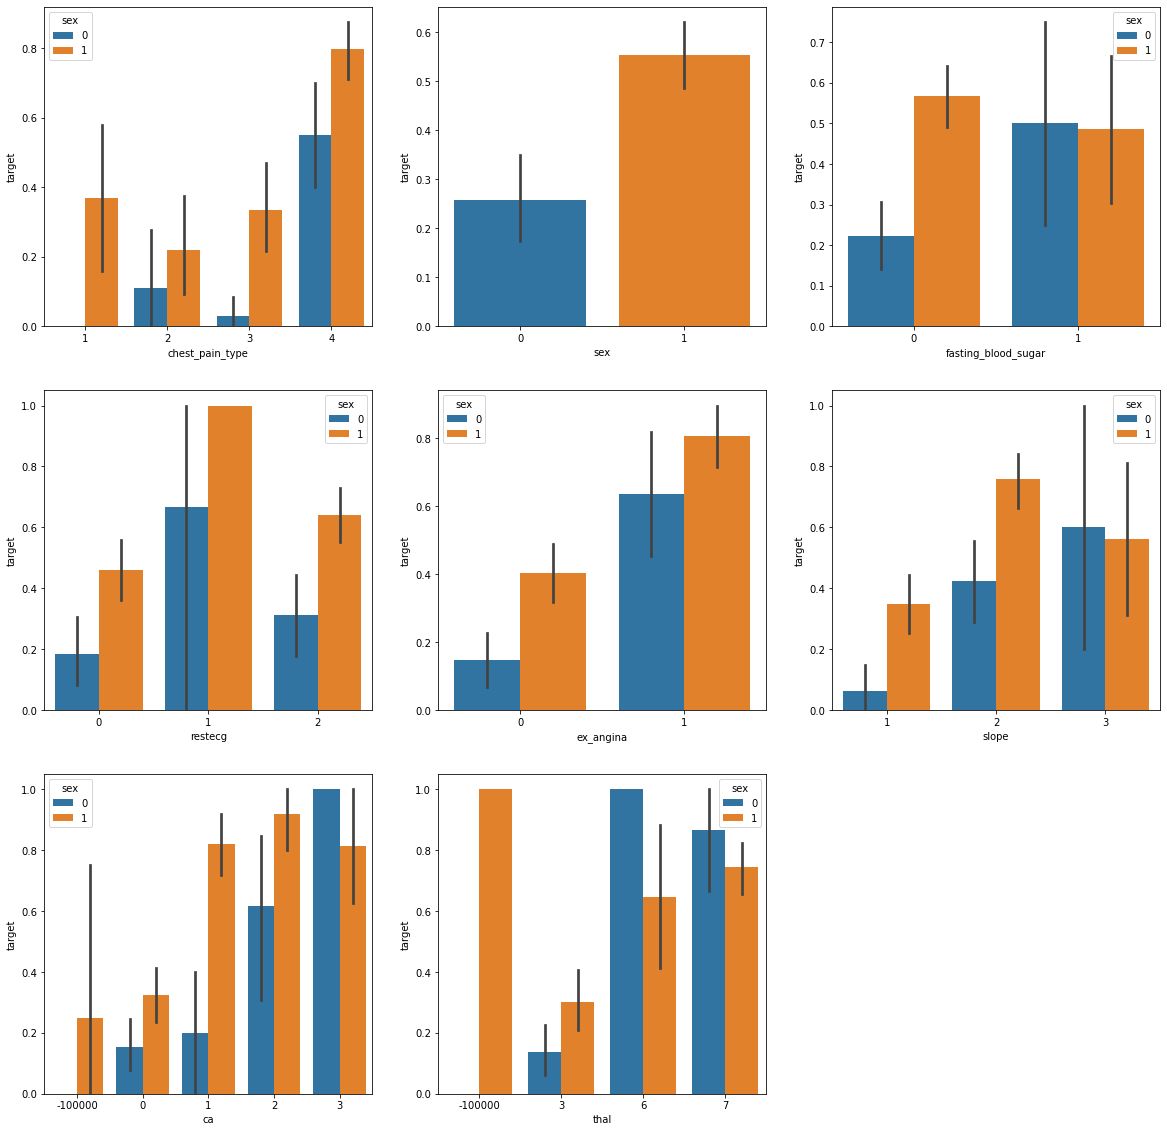

In [145]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.barplot("chest_pain_type","target",data=df,hue="sex")
plt.subplot(3,3,2)
sns.barplot("sex","target",data=df)
plt.subplot(3,3,3)
sns.barplot("fasting_blood_sugar","target",data=df,hue="sex")
plt.subplot(3,3,4)
sns.barplot("restecg","target",data=df,hue="sex")
plt.subplot(3,3,5)
sns.barplot("ex_angina","target",data=df,hue="sex")
plt.subplot(3,3,6)
sns.barplot("slope","target",data=df,hue="sex")
plt.subplot(3,3,7)
sns.barplot("ca","target",data=df,hue="sex")
plt.subplot(3,3,8)
sns.barplot("thal","target",data=df,hue="sex")

### Male have heigher chances to have heart disease because male have all value high like chances of chest pain, ex_angina 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chest_pain_type'}>,
        <AxesSubplot:title={'center':'resting bp'}>],
       [<AxesSubplot:title={'center':'serun_cholestrol'}>,
        <AxesSubplot:title={'center':'fasting_blood_sugar'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'maximum heart rate'}>],
       [<AxesSubplot:title={'center':'ex_angina'}>,
        <AxesSubplot:title={'center':'ST_dep'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

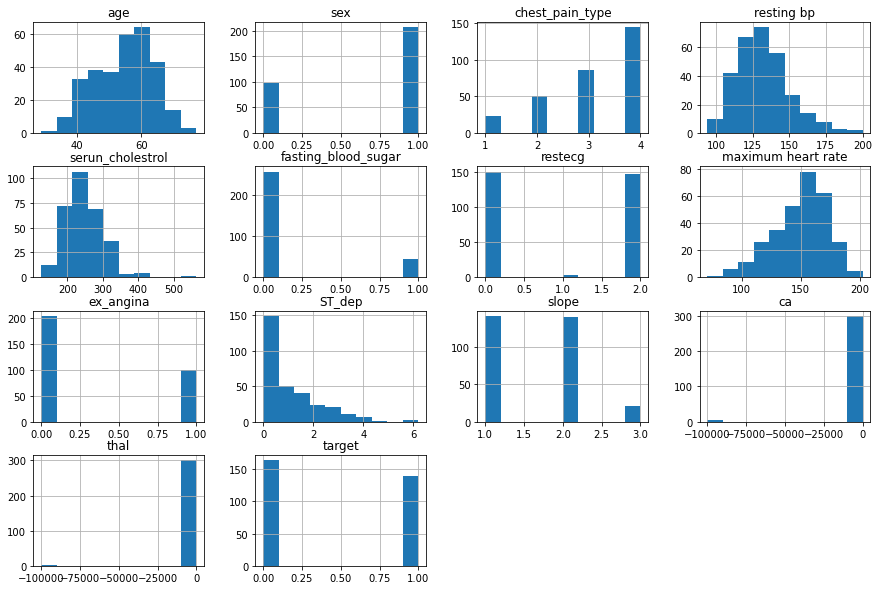

In [146]:

df.hist(figsize=(15,10))

### Most of the numerical data seems to be normall distributed

<AxesSubplot:xlabel='target', ylabel='count'>

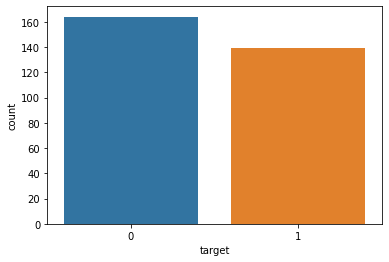

In [147]:
sns.countplot("target",data=df)

### By seeeing countplot  data looks  to be balanced 

### Feature Selection

<AxesSubplot:>

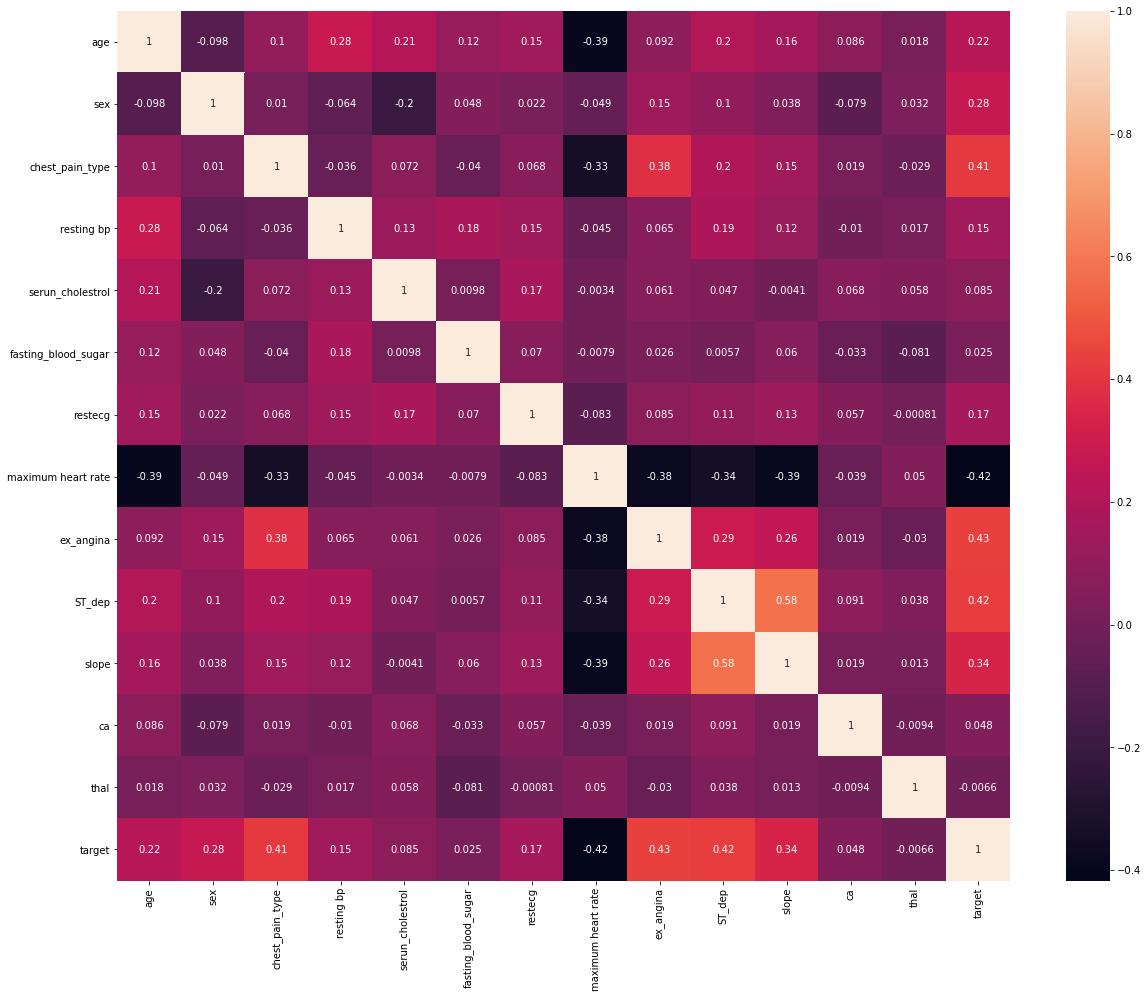

In [148]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot=True)

### All feature seems to very less correlated with each other ##

### Breaking data into training and testing

In [149]:
X=df.iloc[:,:13]
Y=df.iloc[:,13:]
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=25,shuffle=True)

### Feature Scalling

In [150]:
from sklearn.preprocessing import StandardScaler
StandardScaler=StandardScaler()

#X_train
X_train[["age","resting bp","maximum heart rate","serun_cholestrol","ST_dep"]]=StandardScaler.fit_transform(X=X_train[["age","resting bp","maximum heart rate","serun_cholestrol","ST_dep"]])
X_train

,age,sex,chest_pain_type,resting bp,serun_cholestrol,fasting_blood_sugar,restecg,maximum heart rate,ex_angina,ST_dep,slope,ca,thal
1,1.356632,1,4,1.574388,0.801488,0,2,-1.888126,1,0.435360,2,3,3
142,-0.255340,1,2,-0.229438,-0.783697,1,0,1.492560,0,-0.905062,1,0,3
126,0.174519,0,4,3.829171,0.840629,1,2,-0.776058,1,2.669397,3,2,7
37,0.281984,1,4,1.010693,0.605786,0,2,-1.710195,1,-0.368893,2,1,6
275,1.034237,1,1,2.138084,-0.353153,0,2,0.202562,0,-0.368893,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,-0.362805,0,3,-0.680395,0.977620,0,2,0.291527,0,-0.368893,1,0,3
151,-1.329988,0,4,-1.695047,0.390514,0,2,-1.265368,0,-0.368893,2,0,3
255,-1.329988,0,3,-0.680395,-0.705416,0,0,1.003251,0,-0.905062,2,0,3
143,1.034237,1,3,-0.398547,1.251603,0,0,-0.865023,1,0.703445,2,0,7


### Logistic Regression

In [196]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
Logistic_model=model.fit(X_train,Y_train)
Y_pred=Logistic_model.predict(X_test)

print("Accuracy on testing",accuracy_score(Y_test,Y_pred))

Accuracy on testing 0.6065573770491803


In [198]:
from sklearn.metrics  import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.59      0.74      0.66        31
           1       0.64      0.47      0.54        30

    accuracy                           0.61        61
   macro avg       0.61      0.60      0.60        61
weighted avg       0.61      0.61      0.60        61



### Random forest with Cross validation

In [183]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
cv=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
model =RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, X_train, Y_train, scoring=None, cv=cv, n_jobs=-1)
print(scores)

[0.68       0.8        0.83333333 0.95833333 0.58333333 0.91666667
 0.875      0.83333333 0.79166667 0.75      ]


In [199]:
from sklearn.ensemble import RandomForestClassifier
#model=RandomForestClassifier(random_state=0,criterion='entropy', max_depth=5, max_features='log2',
                       #min_samples_leaf=4, n_estimators=50)
model=RandomForestClassifier(criterion='entropy', max_depth=11, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=4, n_estimators=25,
                       random_state=0)
model=model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
print("Accuracy on testing",accuracy_score(Y_test,Y_pred))

Accuracy on testing 0.8524590163934426


In [200]:
from sklearn.metrics  import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.80      0.93      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [185]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(0,50,5)]
max_features=["auto","sqrt","log2"]
max_depth=[int(x) for x in np.linspace(0,50,10)]
min_samples_split=[2,3,4]
min_samples_leaf=[2,4,7,4]


In [186]:
random_grid={"n_estimators":n_estimators,"max_features":max_features,"max_depth":max_depth,"min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf,"criterion":["gini","entropy" ]}
print(random_grid)

rf_randomCV=RandomizedSearchCV(estimator=model,param_distributions=random_grid,n_iter=25,cv=cv,verbose=2,random_state=50,n_jobs=-1)
rf_randomCV.fit(X_train,Y_train)



{'n_estimators': [0, 12, 25, 37, 50], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [0, 5, 11, 16, 22, 27, 33, 38, 44, 50], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [2, 4, 7, 4], 'criterion': ['gini', 'entropy']}
Fitting 10 folds for each of 25 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=5,
                                                    max_features='log2',
                                                    min_samples_leaf=4,
                                                    n_estimators=50,
                                                    random_state=0),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [0, 5, 11, 16, 22, 27, 33,
                                                      38, 44, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 7, 4],
                      

In [187]:
rf_randomCV.best_estimator_



RandomForestClassifier(criterion='entropy', max_depth=11, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=4, n_estimators=25,
                       random_state=0)

### KNN with cross validation

In [188]:
knn_scores=[]
for k in range(0,25):
    model3=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(model3,X_train,Y_train,cv=cv)
    knn_scores.append(score.mean())
knn_scores

[nan,
 0.723,
 0.723,
 0.7683333333333333,
 0.7725,
 0.7686666666666666,
 0.7686666666666667,
 0.7686666666666666,
 0.7601666666666665,
 0.7685,
 0.777,
 0.8016666666666667,
 0.7933333333333333,
 0.7973333333333333,
 0.7975000000000001,
 0.7933333333333333,
 0.7891666666666668,
 0.7891666666666668,
 0.785,
 0.7891666666666667,
 0.7933333333333333,
 0.7891666666666667,
 0.7891666666666667,
 0.7808333333333334,
 0.7808333333333334]

posx and posy should be finite values
posx and posy should be finite values


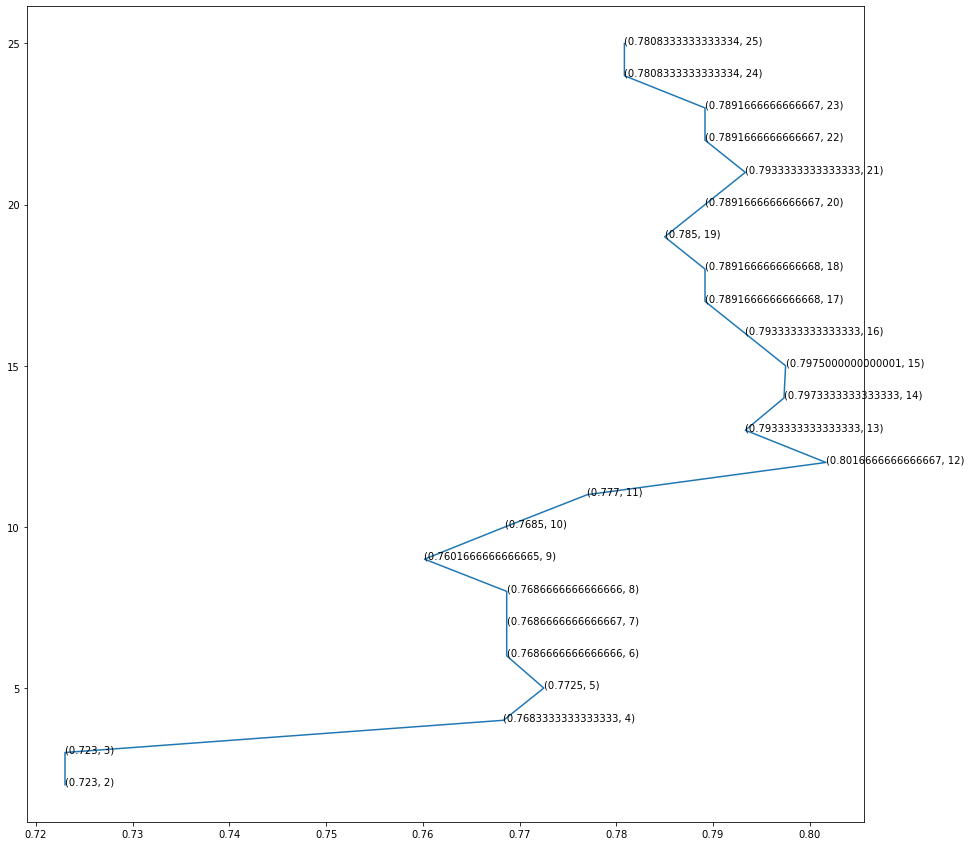

In [189]:
k=[]
plt.figure(figsize=(15,15))
plt.plot(knn_scores,[i for i in range(1,26)])
for i in range(1,26):
    
    plt.text(knn_scores[i-1],i,(knn_scores[i-1],i))

In [191]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier(n_neighbors=15).fit(X_train,Y_train)
Y_pred=model3.predict(X_test)

print("Accuracy on testing",accuracy_score(Y_test,Y_pred))

Accuracy on testing 0.7540983606557377
